<a href="https://colab.research.google.com/github/Armandot1998/Pyton-Jupyter-Notebook/blob/master/Red_Neuronal_Clasificacion_Img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Red Neuronal de reconocimiento de Imagenes
- Imágenes a reconocer: imágenes minúsculas de 32 * 32 píxeles
- Etiquetas: 10 etiquetas posibles (avión, automóvil, pájaro, gato, venado, perro, rana, caballo, barco y camión)
- Tamaño del conjunto de datos: 60000 imágenes, divididas en 50000 para entrenamiento y 10000 para prueba



In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [4]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


Ahora veremos una imagen individual. Si imprimimos la primera imagen de nuestro conjunto de datos de entrenamiento (x_train [0]):


In [5]:

print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

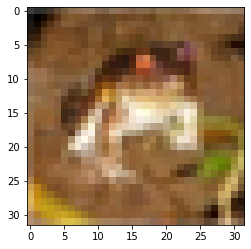

In [7]:
img = plt.imshow(x_train[0])

In [8]:
print('The label is:', y_train[0])

The label is: [6]


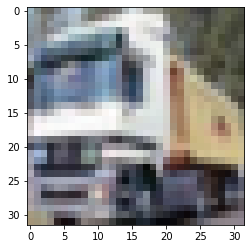

In [9]:
img = plt.imshow(x_train[1])

In [10]:
print('The label is:', y_train[1])

The label is: [9]



Lo que realmente queremos es la probabilidad de cada una de las 10 clases diferentes. Para eso, necesitamos 10 neuronas de salida en nuestra red neuronal. Como tenemos 10 neuronas de salida, nuestras etiquetas también deben coincidir con esto. Para hacer esto, convertimos la etiqueta en un conjunto de 10 números donde cada número representa si la imagen pertenece a esa clase o no. Entonces, si una imagen pertenece a la primera clase, el primer número de este conjunto será un 1 y todos los demás números en este conjunto serán un 0. Para convertir nuestras etiquetas a nuestra codificación de un solo uso, usamos una función en Keras

In [11]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [12]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Un paso común que hacemos es dejar que los valores estén entre 0 y 1, lo que ayudará en el entrenamiento de nuestra red neuronal. Dado que nuestros valores de píxeles ya toman los valores entre 0 y 255, simplemente necesitamos dividir por 255.

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0


Construyendo y entrenando nuestra red neuronal 


Usaremos Keras para construir nuestra arquitectura. Importemos el código de Keras que necesitaremos usar

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


Luego llamamos a un modelo secuencial vacío y 'agregamos' a este modelo capa por capa:

In [16]:
model = Sequential()


La primera capa es una capa conv con filtro de tamaño 3x3, tamaño de zancada 1 (en ambas dimensiones) y profundidad 32. El relleno es el 'mismo' y la activación es 'relu' (estas dos configuraciones se aplicarán a todas las capas en nuestro CNN). Agregamos esta capa a nuestro modelo secuencial vacío usando la función model.add ().

El primer número 32 se refiere a la profundidad. El siguiente par de números (3,3) se refiere al ancho y tamaño del filtro. Luego, especificamos la activación que es 'relu' y el relleno que es 'igual'. Tenga en cuenta que no especificamos zancada. Esto se debe a que stride = 1 es una configuración predeterminada y, a menos que queramos cambiar esta configuración, no necesitamos especificarla.

Si recuerda, también debemos especificar un tamaño de entrada para nuestra primera capa; las capas posteriores no tienen esta especificación ya que pueden inferir el tamaño de entrada del tamaño de salida de la capa anterior.

Dicho todo esto, nuestra primera capa de código se ve así:

In [18]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

Nuestra segunda capa se ve así en el código (no necesitamos especificar el tamaño de entrada)

In [19]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

The next layer is a max pooling layer with pool size 2 x 2 and stride 2 (in both dimensions). The default for a max pooling layer stride is the pool size, so we don't have to specify the stride:

In [20]:
model.add(MaxPooling2D(pool_size=(2, 2)))


Por último, agregamos una capa de deserción con una probabilidad de 0.25 de deserción para evitar el sobreajuste

In [21]:
model.add(Dropout(0.25))

And there we have it, our first four layers in code. The next four layers look really similar (except the depth of the conv layer is 64 instead of 32):

In [22]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(512, activation='relu'))

In [25]:
model.add(Dropout(0.5))

In [26]:
model.add(Dense(10, activation='softmax'))

Para ver un resumen de la arquitectura completa, ejecutamos el código

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)       

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Ahora completamos los mejores números después de haber especificado nuestra arquitectura. Compilaremos el modelo con nuestra configuración a continuación.



In [30]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 337s 8ms/step - loss: 1.6375 - accuracy: 0.3975 - val_loss: 1.2407 - val_accuracy: 0.5437
Epoch 2/20
40000/40000 [==============================] - 335s 8ms/step - loss: 1.1854 - accuracy: 0.5779 - val_loss: 1.0307 - val_accuracy: 0.6436
Epoch 3/20
40000/40000 [==============================] - 333s 8ms/step - loss: 1.0142 - accuracy: 0.6395 - val_loss: 0.8972 - val_accuracy: 0.6868
Epoch 4/20
40000/40000 [==============================] - 345s 9ms/step - loss: 0.9121 - accuracy: 0.6770 - val_loss: 0.8542 - val_accuracy: 0.7011
Epoch 5/20
40000/40000 [==============================] - 361s 9ms/step - loss: 0.8329 - accuracy: 0.7050 - val_loss: 0.7860 - val_accuracy: 0.7292
Epoch 6/20
40000/40000 [==============================] - 341s 9ms/step - loss: 0.7755 - accuracy: 0.7268 - val_loss: 0.7404 - val_accuracy: 0.7411
Epoch 7/20
40000/40000 [==============================] - 366s


Después de completar el entrenamiento, podemos visualizar el entrenamiento del modelo y la pérdida de validación, así como la precisión del entrenamiento / validación sobre la cantidad de épocas usando el siguiente código

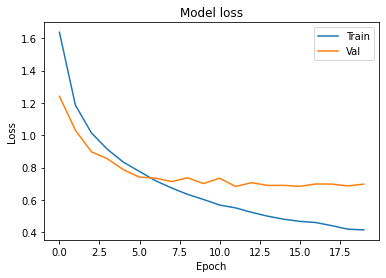

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Una vez que hayamos terminado de ajustar nuestros hiperparámetros, podemos ejecutarlo en nuestro conjunto de datos de prueba a continuación

In [34]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 19s 2ms/step


0.7724000215530396

En este punto, es posible que desee guardar su modelo entrenado (ya que ha pasado tanto tiempo esperando que entrene). El modelo se guardará en un formato de archivo llamado HDF5 (con la extensión .h5). Guardamos nuestro modelo con esta línea de código

In [35]:
model.save('my_cifar10_model.h5')

#### Probando con imagenes externas

Ahora que tenemos un modelo, probémoslo en nuestras propias imágenes. Para hacerlo, coloque su imagen en el mismo directorio que su computadora portátil. A los efectos de esta publicación, voy a utilizar una imagen de un gato (que puede descargar aquí (enlace)). Ahora, leemos en nuestro archivo JPEG como una matriz de valores de píxeles

In [36]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cat.png to cat.png
User uploaded file "cat.png" with length 7866 bytes


In [38]:
my_image = plt.imread("cat.png")

In [39]:

from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

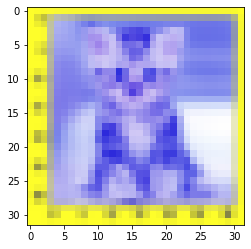

In [40]:
img = plt.imshow(my_image_resized)

In [41]:

import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [42]:
probabilities


array([[0.08695175, 0.01371823, 0.14404468, 0.2272227 , 0.21087997,
        0.02979754, 0.00788923, 0.01507853, 0.01771061, 0.24670672]],
      dtype=float32)

In [43]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: truck -- Probability: 0.24670672
Second most likely class: cat -- Probability: 0.2272227
Third most likely class: deer -- Probability: 0.21087997
Fourth most likely class: bird -- Probability: 0.14404468
Fifth most likely class: airplane -- Probability: 0.086951755
